In [ ]:
!pip install scipy 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


Generate Cities List

In [2]:
lat_lngs = []
cities = []
np.random.seed(600)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

593

In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country_id = []
counter_record = 0
for city in cities:
    weather_resp = requests.get(query_url + city).json()
    counter_record+=1
    try:
        city_name.append(weather_resp['name'])
        lat.append(weather_resp['coord']['lat'])
        lng.append(weather_resp['coord']['lon'])
        max_temp.append(weather_resp['main']['temp_max'])
        humidity.append(weather_resp['main']['humidity'])
        cloudiness.append(weather_resp['clouds']['all'])
        wind_speed.append(weather_resp['wind']['speed'])
        date.append(weather_resp['dt'])
        country_id.append(weather_resp['sys']['country'][:])

        print(f"Processing Record {counter_record} of Set [1] | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
# print(weather_resp)

essing Record 130 of Set [0] | gat
Processing Record 131 of Set [0] | cervo
City not found. Skipping...
Processing Record 133 of Set [0] | iqaluit
Processing Record 134 of Set [0] | henties bay
Processing Record 135 of Set [0] | khatanga
Processing Record 136 of Set [0] | taoudenni
Processing Record 137 of Set [0] | constitucion
Processing Record 138 of Set [0] | sibi
Processing Record 139 of Set [0] | trofors
Processing Record 140 of Set [0] | kuala terengganu
Processing Record 141 of Set [0] | lisala
Processing Record 142 of Set [0] | gambiran
Processing Record 143 of Set [0] | coihaique
Processing Record 144 of Set [0] | lulea
Processing Record 145 of Set [0] | bolgatanga
Processing Record 146 of Set [0] | marawi
Processing Record 147 of Set [0] | tselinnoye
Processing Record 148 of Set [0] | mount isa
Processing Record 149 of Set [0] | srednekolymsk
Processing Record 150 of Set [0] | hervey bay
Processing Record 151 of Set [0] | bengkulu
Processing Record 152 of Set [0] | fairbanks

In [37]:
weather_data = pd.DataFrame({'City': city_name, 'Lat': lat, 'Long': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country_id, 'Date': date}) 
weather_data.to_csv(output_data_file, index=False)

In [9]:
weather_data.count()

City          545
Lat           545
Long          545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [10]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,70.00,85,53,3.53,US,1597469726
1,Kavieng,-2.57,150.80,82.67,71,100,2.91,PG,1597469725
2,Flin Flon,54.77,-101.86,55.71,83,76,5.68,CA,1597469964
3,Ushuaia,-54.80,-68.30,35.60,64,75,12.75,AR,1597469964
4,Broome,42.25,-75.83,68.00,82,90,3.36,US,1597469815
...,...,...,...,...,...,...,...,...,...
540,Moose Jaw,50.40,-105.53,60.80,63,75,3.36,CA,1597470053
541,Tres Arroyos,-38.37,-60.28,39.18,73,4,10.63,AR,1597470054
542,Yulara,-25.24,130.99,71.60,19,0,6.93,AU,1597470054
543,Ferrol,43.48,-8.24,62.01,93,40,5.82,ES,1597470054


Inspect the data and remove the cities where the humidity > 100%.

In [11]:
humidity_check = weather_data.describe()
humidity_check

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.160844,17.845156,68.354569,71.027523,51.313761,8.279963,1.597470e+09
std,34.235922,92.551982,14.278340,20.438510,37.785417,5.409035,8.767946e+01
min,-54.800000,-175.200000,28.580000,3.000000,0.000000,0.430000,1.597469e+09
25%,-10.620000,-66.830000,57.200000,60.000000,11.000000,4.470000,1.597470e+09
50%,21.430000,21.290000,70.000000,74.000000,55.000000,6.930000,1.597470e+09
75%,49.670000,102.500000,79.140000,87.000000,90.000000,11.410000,1.597470e+09
max,78.220000,179.320000,103.010000,100.000000,100.000000,33.200000,1.597470e+09


Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

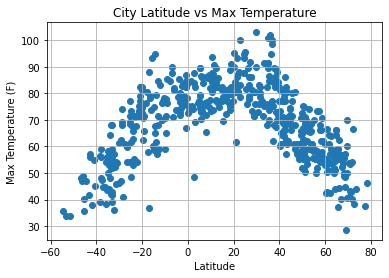

In [12]:
x_axis = weather_data['Lat']
y_axis = weather_data['Max Temp']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
plt.show()

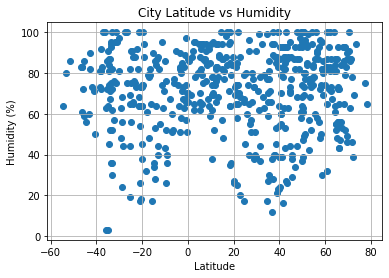

In [13]:
x_axis = weather_data['Lat']
y_axis = weather_data['Humidity']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.show()

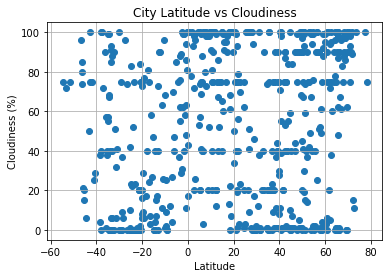

In [14]:
x_axis = weather_data['Lat']
y_axis = weather_data['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.show()

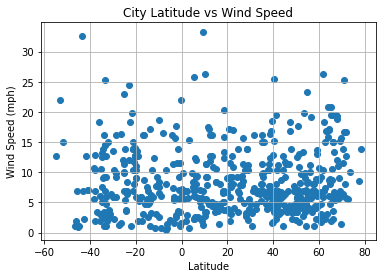

In [15]:
x_axis = weather_data['Lat']
y_axis = weather_data['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.show()

Linear Regression

In [16]:
columns = ['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
northern_hemisphere_data = weather_data.loc[weather_data["Lat"] > 0, columns]
northern_hemisphere_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,70.00,85,53,3.53,US,1597469726
2,Flin Flon,54.77,-101.86,55.71,83,76,5.68,CA,1597469964
4,Broome,42.25,-75.83,68.00,82,90,3.36,US,1597469815
10,College,64.86,-147.80,66.20,55,75,8.05,US,1597469966
12,Upernavik,72.79,-56.15,38.30,69,11,5.53,GL,1597469706
...,...,...,...,...,...,...,...,...,...
537,Son La,21.32,103.90,80.49,85,93,1.97,VN,1597470053
538,Muros,42.78,-9.06,57.20,87,75,4.70,ES,1597470053
539,Wukari,7.85,9.78,72.00,94,98,5.10,NG,1597470053
540,Moose Jaw,50.40,-105.53,60.80,63,75,3.36,CA,1597470053


In [17]:
columns = ['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
southern_hemisphere_data = weather_data.loc[weather_data["Lat"] < 0, columns]
southern_hemisphere_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kavieng,-2.57,150.80,82.67,71,100,2.91,PG,1597469725
3,Ushuaia,-54.80,-68.30,35.60,64,75,12.75,AR,1597469964
5,Busselton,-33.65,115.33,68.00,36,85,25.21,AU,1597469752
6,Vaini,-21.20,-175.20,71.60,68,20,10.29,TO,1597469965
7,Kaitangata,-46.28,169.85,48.00,61,80,1.99,NZ,1597469965
...,...,...,...,...,...,...,...,...,...
528,Katherine,-14.47,132.27,95.00,28,40,6.93,AU,1597470051
530,Saint-Joseph,-21.37,55.62,73.40,64,20,13.87,RE,1597470051
541,Tres Arroyos,-38.37,-60.28,39.18,73,4,10.63,AR,1597470054
542,Yulara,-25.24,130.99,71.60,19,0,6.93,AU,1597470054


Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared is: 0.5552946389291551
y = -0.5x + 89.64


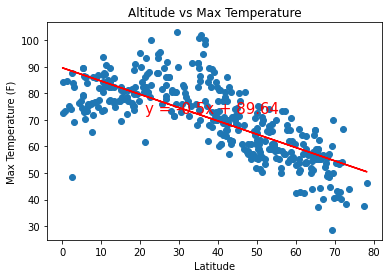

In [27]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Altitude vs Max Temperature')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()



Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared is: 0.6287750810429542
y = 0.87x + 84.24


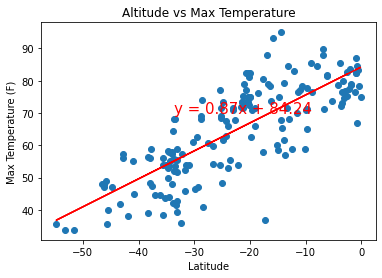

In [28]:
x_axis =southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-33.65, 70.00),fontsize=15,color="red")
plt.title('Altitude vs Max Temperature')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared is: 0.0015388158316560275
y = -0.04x + 73.59


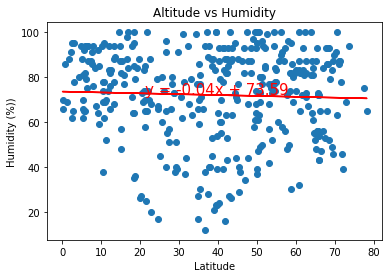

In [30]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Altitude vs Humidity')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared is: 0.007209504441902618
y = -0.13x + 65.74


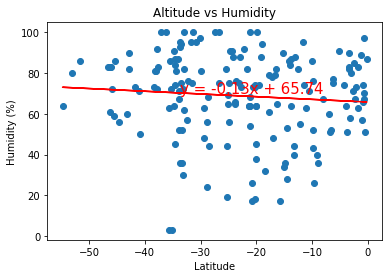

In [26]:
x_axis =southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-33.65, 70.00),fontsize=15,color="red")
plt.title('Altitude vs Humidity')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared is: 8.978624585006467e-05
y = -0.02x + 57.27


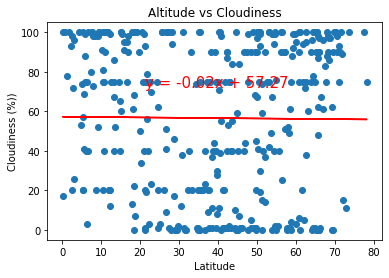

In [29]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Altitude vs Cloudiness')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared is: 0.0006538977441304351
y = 0.07x + 41.61


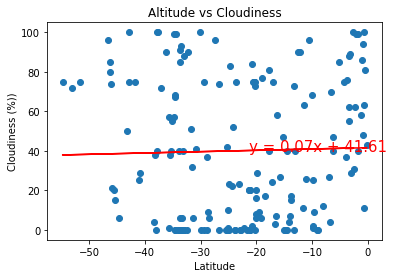

In [32]:
x_axis = southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.annotate(line_eq,(-21.32, 40),fontsize=15,color="r")
plt.title('Altitude vs Cloudiness')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared is: 0.010844848409574967
y = 0.03x + 7.21


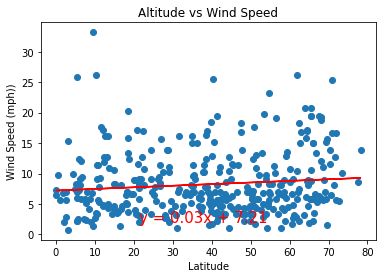

In [33]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.annotate(line_eq,(21.32, 1.97),fontsize=15,color="r")
plt.title('Altitude vs Wind Speed')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared is: 0.0019288540073311767
y = -0.02x + 7.94


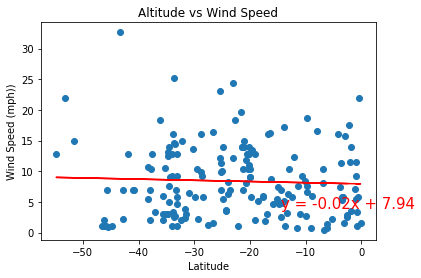

In [34]:
x_axis = southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.annotate(line_eq,(-14.47, 3.93),fontsize=15,color="r")
plt.title('Altitude vs Wind Speed')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()